<a href="https://colab.research.google.com/github/RandyGirl/ML-22/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Fortune 1000 Data

 - Type of problem: Regression.
 - Goal: Predict Market Capitalization of the company.

## Imports and Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV

In [2]:
FIG_SIZE = (20, 15)
plt.rc('figure', figsize=FIG_SIZE)

## Get data

In [3]:
!wget https://raw.githubusercontent.com/RandyGirl/ML-22/main/Fortune_1000.csv

--2022-05-22 17:58:36--  https://raw.githubusercontent.com/RandyGirl/ML-22/main/Fortune_1000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138487 (135K) [text/plain]
Saving to: ‘Fortune_1000.csv’

Fortune_1000.csv    100%[===================>] 135.24K  --.-KB/s    in 0.03s   

2022-05-22 17:58:37 (5.14 MB/s) - ‘Fortune_1000.csv’ saved [138487/138487]



In [4]:
df = pd.read_csv('/content/Fortune_1000.csv')
df

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Mr. Cooper Group,996,0.0,2007.0,274.0,9100,Financials,Coppell,TX,NaN,no,no,yes,,Jay Bray,https://mrcoopergroup.com,COOP,674.1
996,Herc Holdings,997,0.0,1999.0,47.5,5100,Business Services,Bonita Springs,FL,NaN,no,no,yes,,Lawrence H. Silber,https://www.hercrentals.com,HRI,590.5
997,Healthpeak Properties,998,0.0,1997.4,45.5,204,Financials,Irvine,CA,NaN,no,no,yes,,Thomas M. Herzog,https://www.hcpi.com,PEAK,12059.3
998,SPX FLOW,999,0.0,1996.3,-95.1,5000,Industrials,Charlotte,NC,NaN,no,no,no,,Marcus G. Michael,https://www.spxflow.com,FLOW,1211.8


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             998 non-null    float64
 5   num. of employees  1000 non-null   int64  
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           500 non-null    object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                992 non-null    object 
 15  Website            1000 non-null   object 
 16  Ticker             938 no

In [5]:
df.describe()

,rank,rank_change,revenue,profit,num. of employees
count,1000.000000,1000.000000,1000.000000,998.000000,1.000000e+03
mean,500.497000,0.426000,15902.339000,1344.702806,3.461598e+04
std,288.820278,22.424169,34762.973179,4515.839383,9.202401e+04
min,1.000000,-186.000000,1990.300000,-8506.000000,5.100000e+01
25%,250.750000,0.000000,3164.200000,110.650000,6.400000e+03
50%,500.500000,0.000000,5647.000000,380.700000,1.300000e+04
75%,750.250000,0.000000,12819.775000,1061.075000,2.919200e+04
max,1000.000000,224.000000,523964.000000,81417.000000,2.200000e+06


In [6]:
df.isna().mean().sort_values(ascending=False)

newcomer             0.500
Ticker               0.062
Market Cap           0.040
CEO                  0.008
profit               0.002
revenue              0.000
num. of employees    0.000
sector               0.000
city                 0.000
state                0.000
rank                 0.000
ceo_founder          0.000
ceo_woman            0.000
profitable           0.000
prev_rank            0.000
Website              0.000
rank_change          0.000
company              0.000
dtype: float64

In [7]:
for col in df:
  unq_vals = df[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'Unique {col:17} | {df[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'Unique {col:17} | {df[col].dtype} | {num_unq_vals:5} |')

Unique company           | object |  1000 |
Unique rank              | int64 |   997 |
Unique rank_change       | float64 |   118 |
Unique revenue           | float64 |   993 |
Unique profit            | float64 |   960 |
Unique num. of employees | int64 |   730 |
Unique sector            | object |    21 |
Unique city              | object |   402 |
Unique state             | object |    46 |
Unique newcomer          | object |     3 | ['no' 'yes' nan]
Unique ceo_founder       | object |     2 | ['no' 'yes']
Unique ceo_woman         | object |     2 | ['no' 'yes']
Unique profitable        | object |     2 | ['yes' 'no']
Unique prev_rank         | object |   477 |
Unique CEO               | object |   990 |
Unique Website           | object |   999 |
Unique Ticker            | object |   939 |
Unique Market Cap        | object |   947 |


In [8]:
{ col: len(df[col].unique()) for col in df.select_dtypes('object').columns }

{'CEO': 990,
 'Market Cap': 947,
 'Ticker': 939,
 'Website': 999,
 'ceo_founder': 2,
 'ceo_woman': 2,
 'city': 402,
 'company': 1000,
 'newcomer': 3,
 'prev_rank': 477,
 'profitable': 2,
 'sector': 21,
 'state': 46}

In [9]:
df['Market Cap'].unique()

array(['411690', '1637405', '177923', '2221176', '98496', '550878',
       '332885', '29570', '206369', '21246', '1274139', '26297', '60335',
       '160040', '156714', '16018', '414465', '79953', '41552', '236948',
       '1696122', '24840', '25178', '11350', '279768', '295312', '27084',
       '223642', '79964', '99941', '131684', '22928', '53132', '57773',
       '427473', nan, '94296', '115909', '104549', '89183', '6404',
       '36191', '138166', '126315', '202996', '768185', '66788', '46483',
       '315029', '324875', '195312', '54438', '33268', '29767', '7118',
       '26828', '95594', '32499', '17648', '104183', '135401', '104491',
       '191585', '202882', '56831', '27682', '103823', '26543', '208627',
       '5655', '137205', '33752', '-', '29062', '9114', '30430', '24169',
       '81992', '170158', '44203', '94622', '225123', '56224', '209200',
       '1489', '146007', '61446', '41928', '49812', '50946', '1463',
       '198828', '988', '38472', '98187', '200082', '36735', 

In [10]:
df['Market Cap'] = df['Market Cap'].replace({
  '-': np.nan 
})

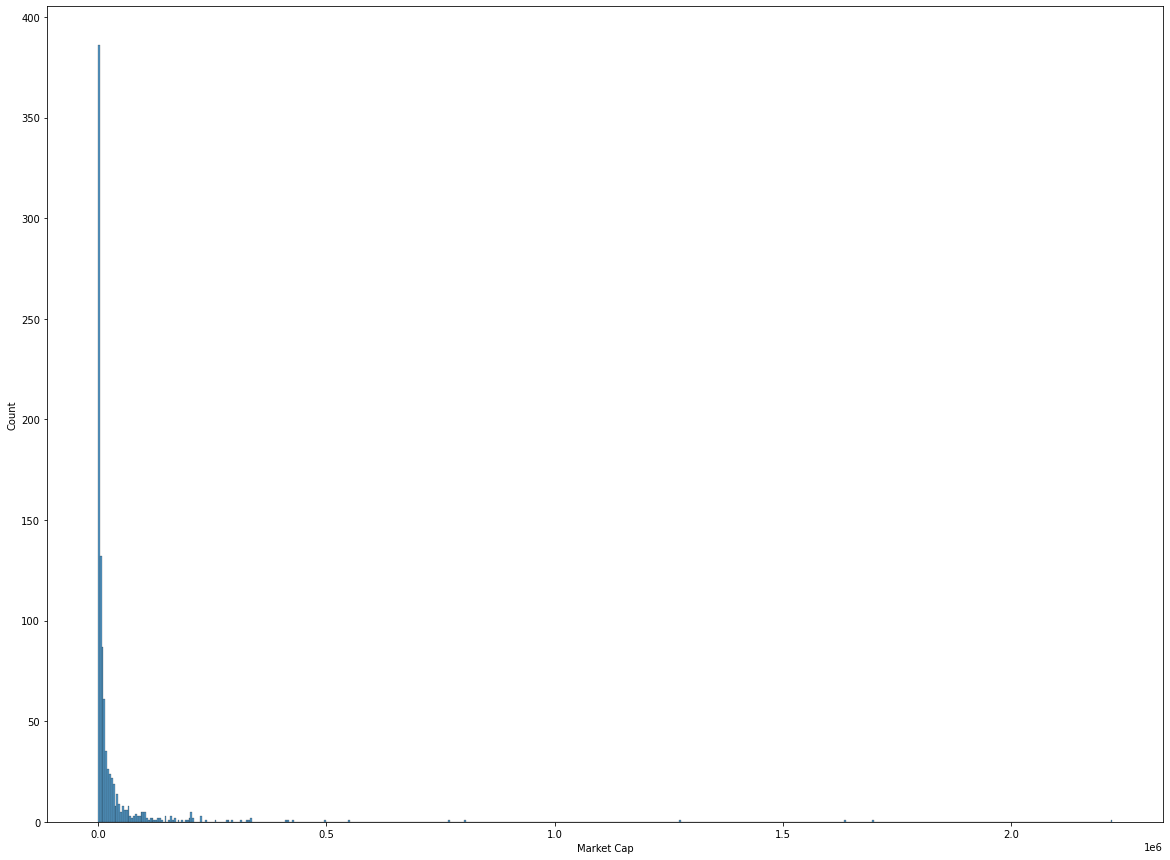

In [11]:
ax = sns.histplot(df['Market Cap'].astype(float))

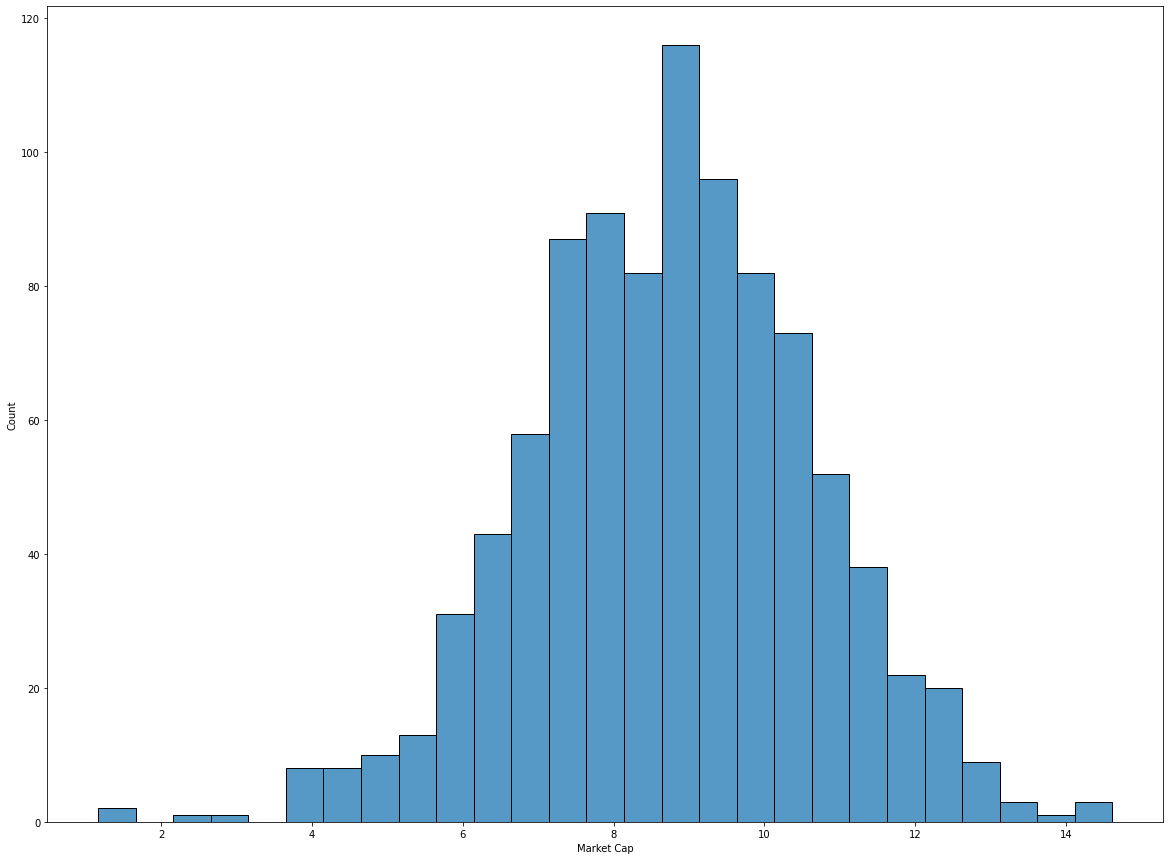

In [12]:
ax = sns.histplot(np.log1p(df['Market Cap'].astype(float)))

In [13]:
features = df.select_dtypes('number')
features

,rank,rank_change,revenue,profit,num. of employees
0,1,0.0,523964.0,14881.0,2200000
1,2,3.0,280522.0,11588.0,798000
2,3,-1.0,264938.0,14340.0,74900
3,4,-1.0,260174.0,55256.0,137000
4,5,3.0,256776.0,6634.0,290000
...,...,...,...,...,...
995,996,0.0,2007.0,274.0,9100
996,997,0.0,1999.0,47.5,5100
997,998,0.0,1997.4,45.5,204
998,999,0.0,1996.3,-95.1,5000


In [14]:
cap = df['Market Cap'].fillna(df['Market Cap'].mode()[0])
cap

0       411690
1      1637405
2       177923
3      2221176
4        98496
        ...   
995      674.1
996      590.5
997    12059.3
998     1211.8
999      302.8
Name: Market Cap, Length: 1000, dtype: object

In [15]:
cap = cap.astype(float)
features = features.join(cap)
features

,rank,rank_change,revenue,profit,num. of employees,Market Cap
0,1,0.0,523964.0,14881.0,2200000,411690.0
1,2,3.0,280522.0,11588.0,798000,1637405.0
2,3,-1.0,264938.0,14340.0,74900,177923.0
3,4,-1.0,260174.0,55256.0,137000,2221176.0
4,5,3.0,256776.0,6634.0,290000,98496.0
...,...,...,...,...,...,...
995,996,0.0,2007.0,274.0,9100,674.1
996,997,0.0,1999.0,47.5,5100,590.5
997,998,0.0,1997.4,45.5,204,12059.3
998,999,0.0,1996.3,-95.1,5000,1211.8


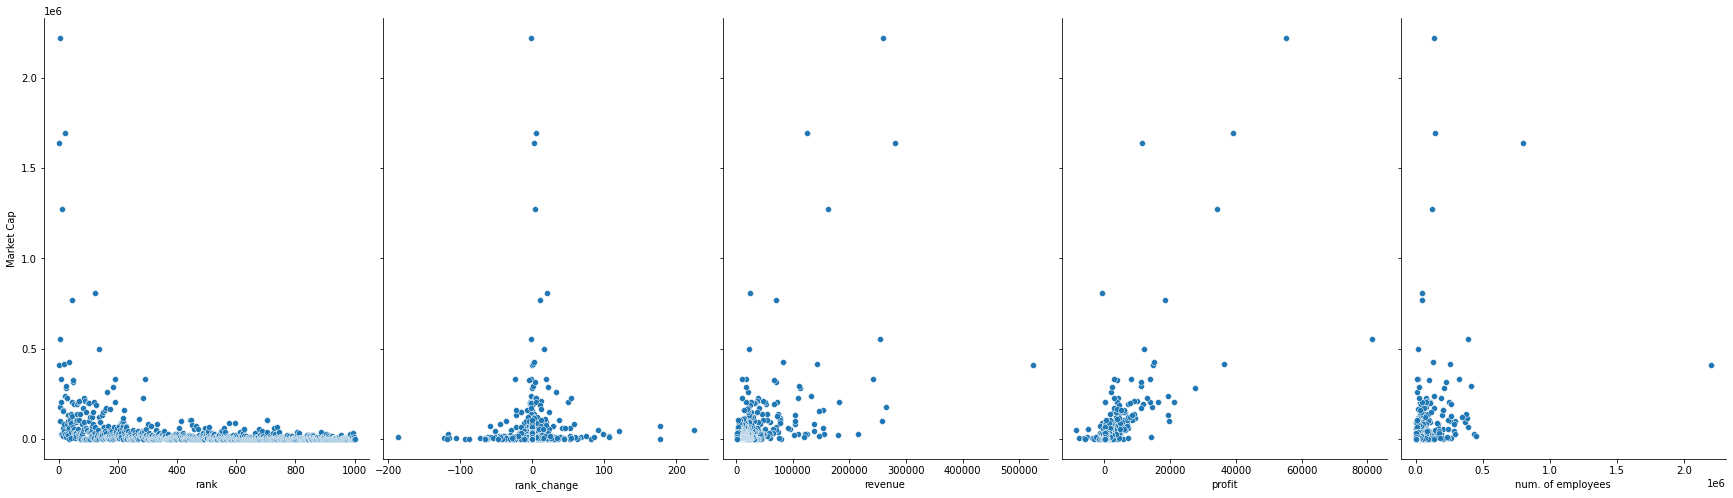

In [16]:
sns.pairplot(features, x_vars=['rank', 'rank_change', 'revenue', 'profit', 'num. of employees'], y_vars='Market Cap', height=7, aspect=0.7)
plt.show()

In [17]:
df['newcomer'].value_counts()

no     477
yes     23
Name: newcomer, dtype: int64

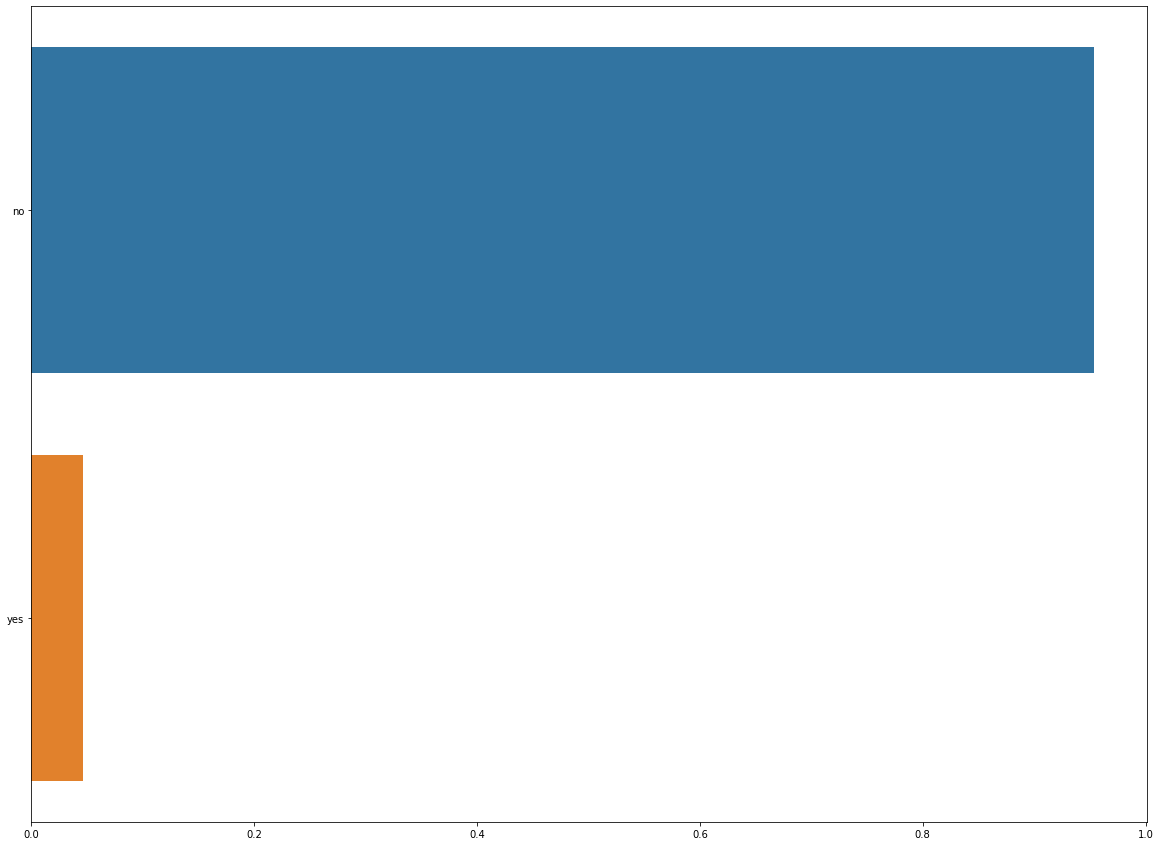

In [18]:
ax = sns.barplot(
    y=df['newcomer'].value_counts(normalize=True).index,
    x=df['newcomer'].value_counts(normalize=True).values,
)

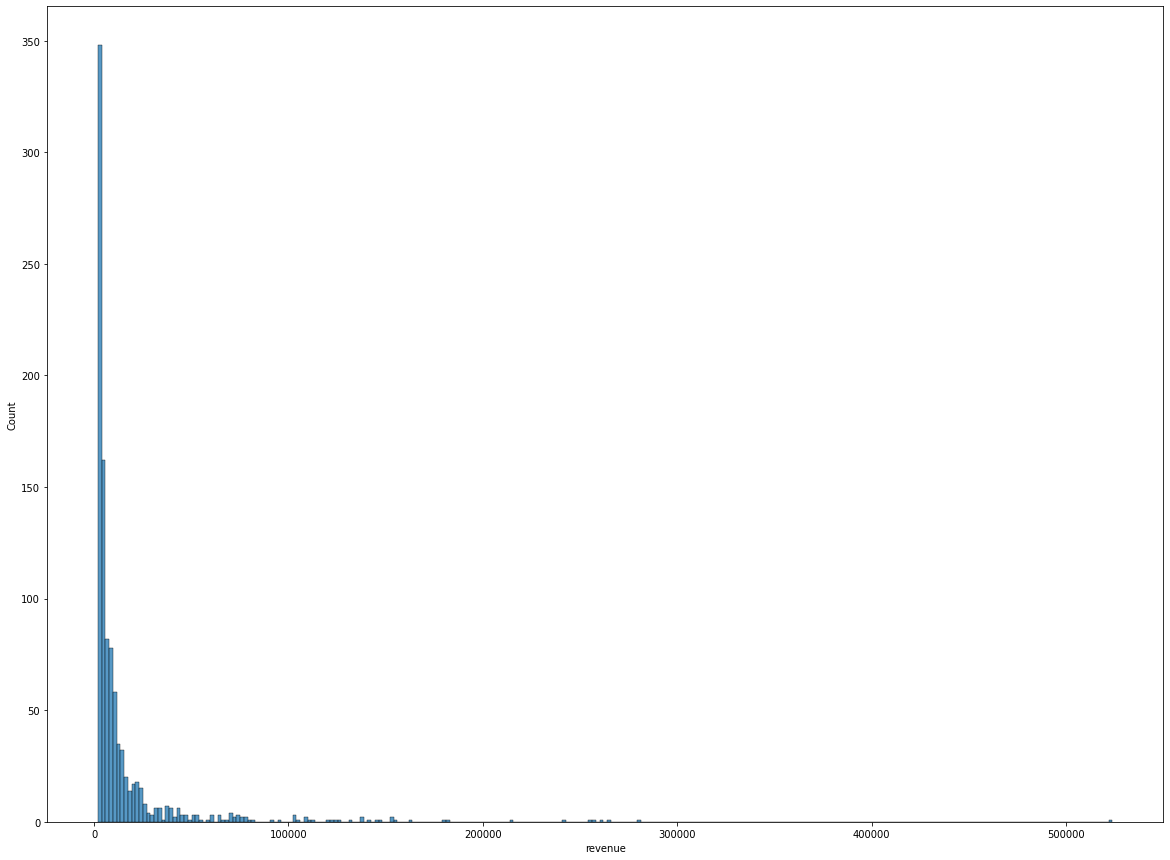

In [19]:
ax = sns.histplot(df['revenue'])

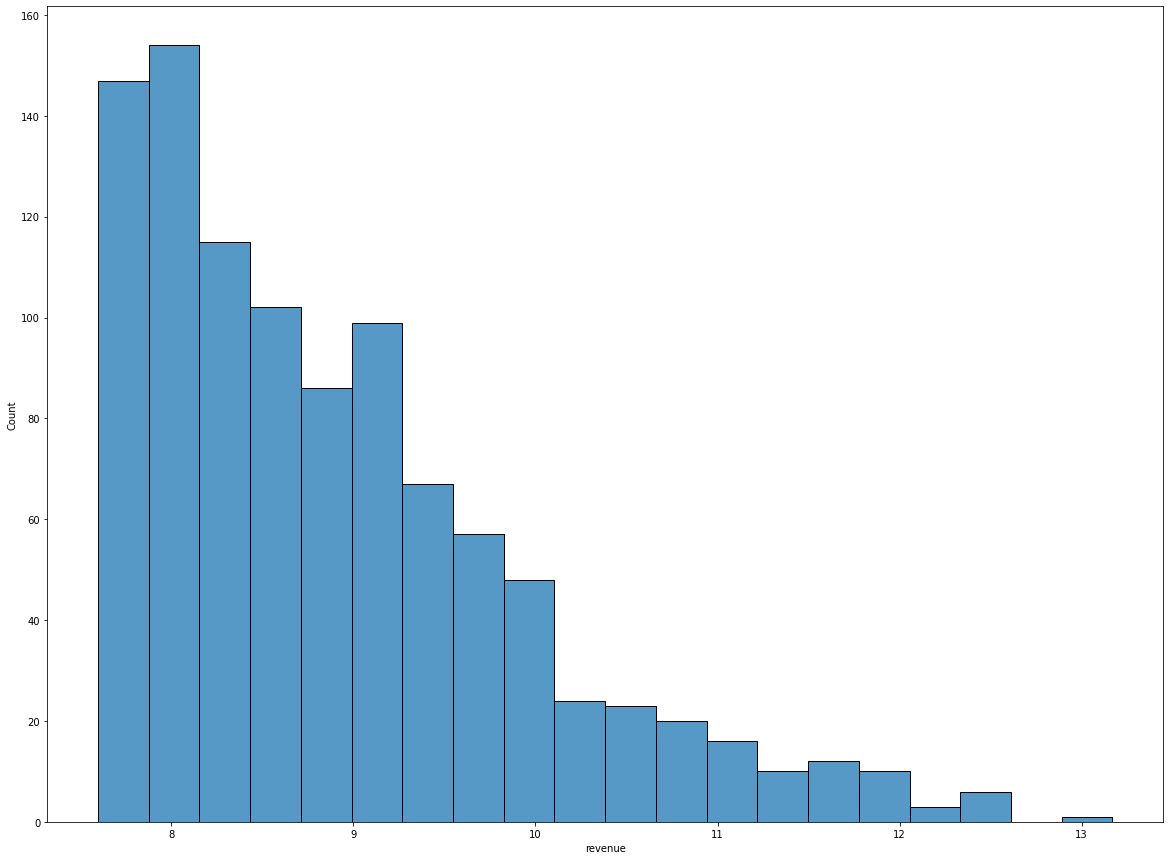

In [20]:
ax = sns.histplot(np.log1p(df['revenue']))

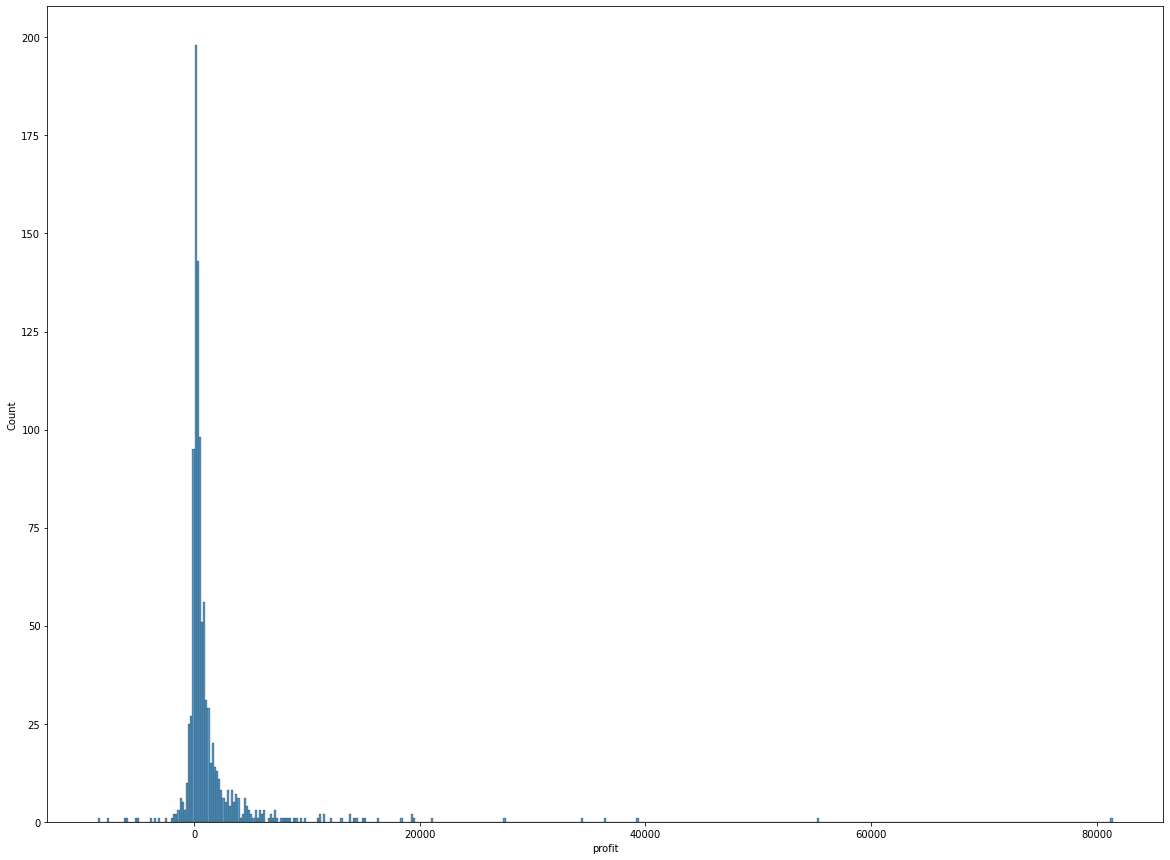

In [21]:
ax = sns.histplot(df['profit'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


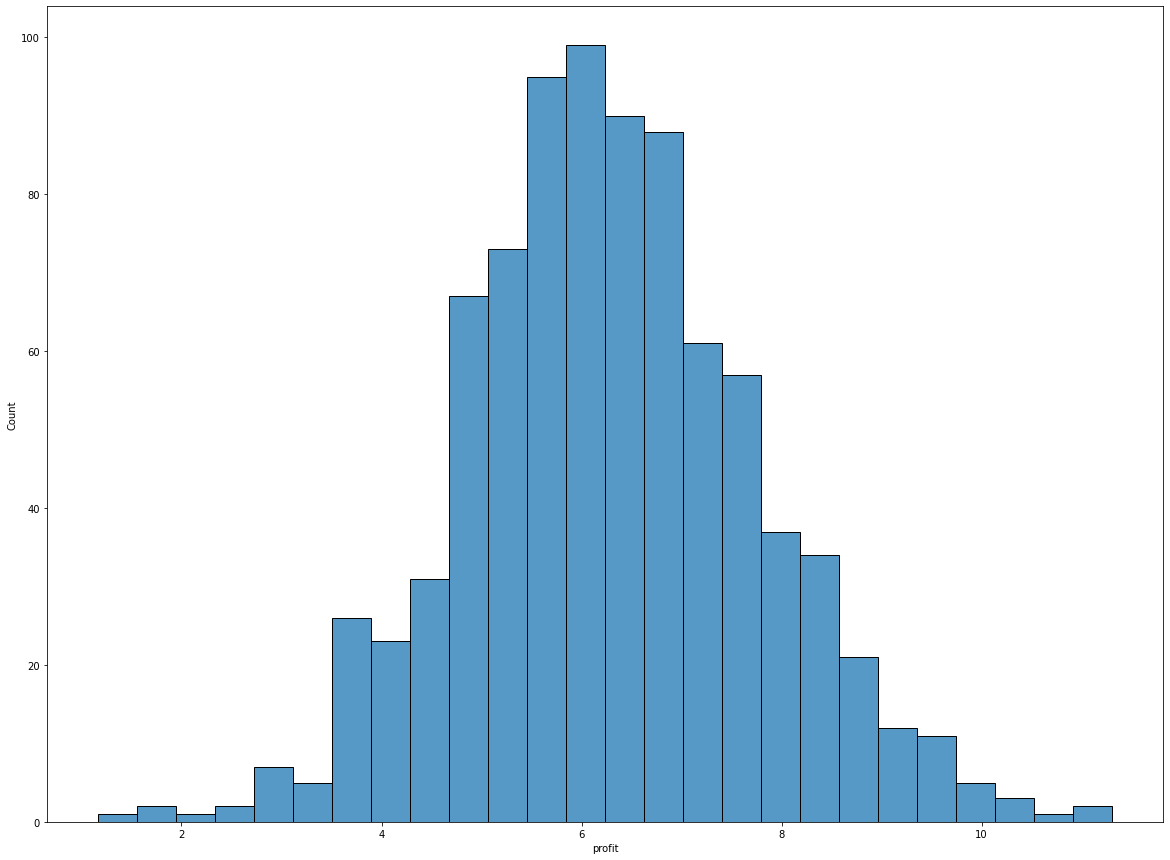

In [22]:
ax = sns.histplot(np.log1p(df['profit']))

In [23]:
df['sector'].value_counts(normalize=True)

Financials                       0.162
Technology                       0.109
Energy                           0.109
Retailing                        0.075
Health Care                      0.071
Business Services                0.052
Industrials                      0.050
Materials                        0.046
Transportation                   0.038
Food, Beverages & Tobacco        0.037
Wholesalers                      0.035
Engineering & Construction       0.030
Chemicals                        0.027
Hotels, Restaurants & Leisure    0.027
Household Products               0.026
Media                            0.025
Aerospace & Defense              0.022
Motor Vehicles & Parts           0.022
Apparel                          0.016
Telecommunications               0.011
Food & Drug Stores               0.010
Name: sector, dtype: float64

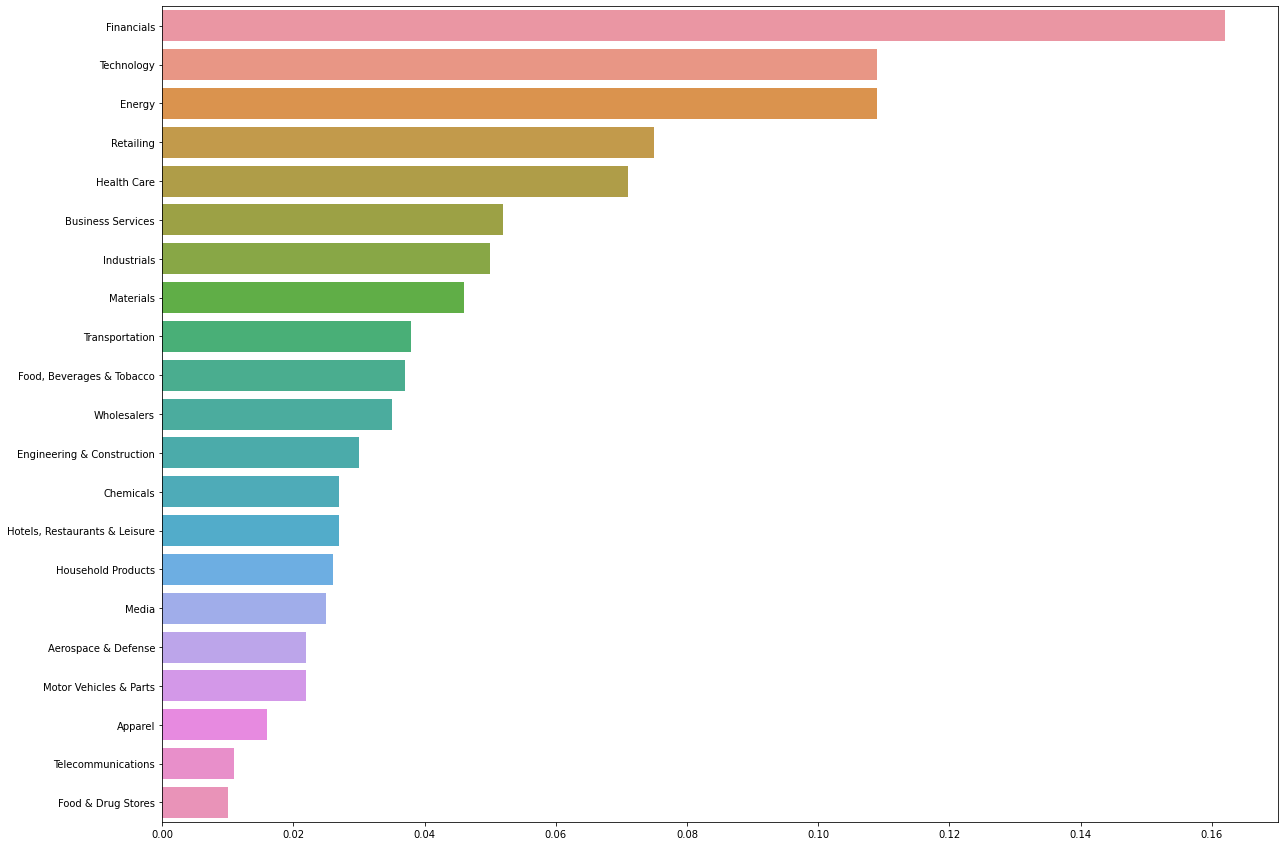

In [24]:
ax = sns.barplot(
    y=df['sector'].value_counts(normalize=True).index,
    x=df['sector'].value_counts(normalize=True).values,
)

In [25]:
df['state'].value_counts(normalize=True)

CA    0.121
TX    0.095
NY    0.089
IL    0.065
OH    0.053
PA    0.044
FL    0.038
VA    0.035
GA    0.034
MA    0.033
NC    0.031
MI    0.029
NJ    0.027
CT    0.025
MN    0.024
WI    0.023
CO    0.023
MO    0.020
TN    0.020
AZ    0.019
IN    0.018
WA    0.016
MD    0.013
OK    0.012
NV    0.009
NE    0.008
AR    0.008
KY    0.007
RI    0.007
IA    0.006
OR    0.006
DE    0.006
KS    0.004
ID    0.004
LA    0.004
DC    0.004
AL    0.003
SC    0.003
UT    0.003
HI    0.003
NH    0.002
PR    0.002
ND    0.001
MS    0.001
VT    0.001
ME    0.001
Name: state, dtype: float64

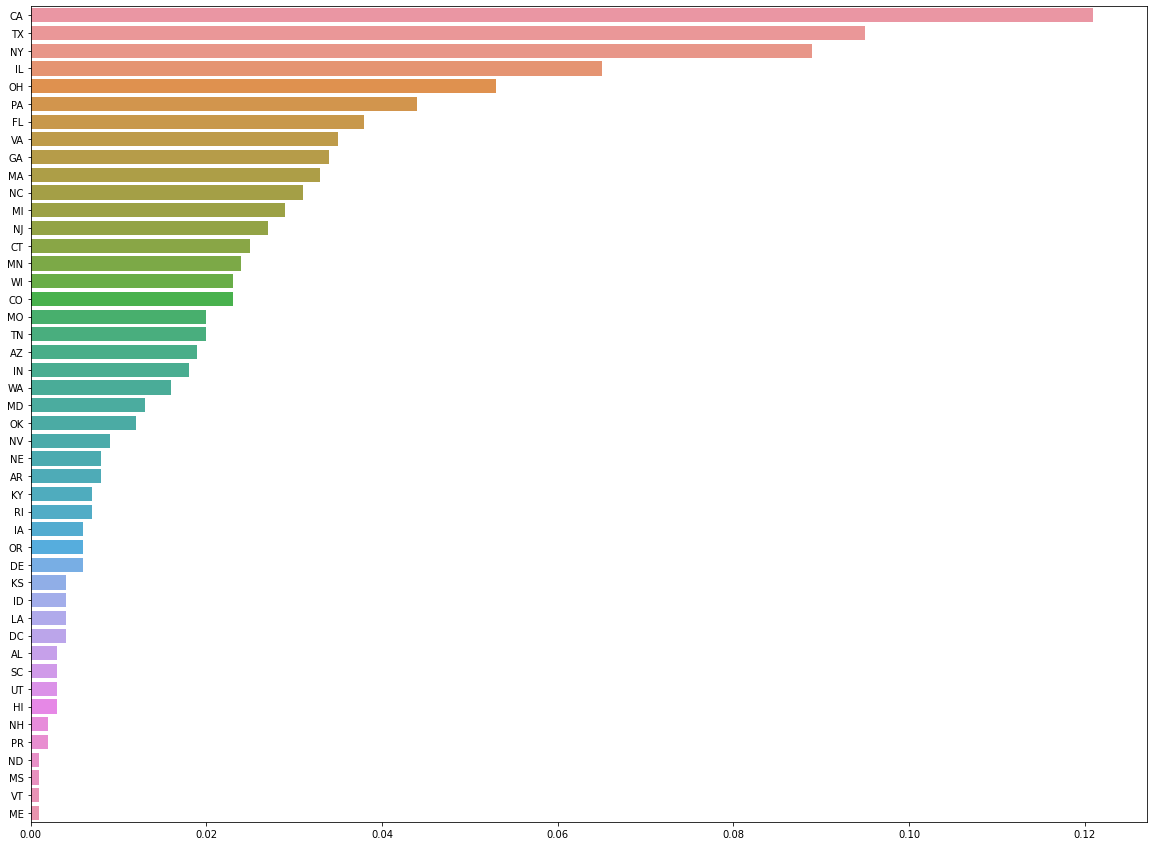

In [26]:
ax = sns.barplot(
    y=df['state'].value_counts(normalize=True).index,
    x=df['state'].value_counts(normalize=True).values,
)

In [31]:
df['prev_rank'].value_counts(normalize=True)

         0.523
210.0    0.002
1.0      0.001
315.0    0.001
317.0    0.001
         ...  
151.0    0.001
149.0    0.001
122.0    0.001
145.0    0.001
471.0    0.001
Name: prev_rank, Length: 477, dtype: float64

In [33]:
df['prev_rank'].unique()

array(['1.0', '5.0', '2.0', '3.0', '8.0', '4.0', '6.0', '7.0', '9.0',
       '10.0', '15.0', '12.0', '65.0', '14.0', '11.0', '16.0', '18.0',
       '13.0', '17.0', '19.0', '26.0', '31.0', '20.0', '22.0', '25.0',
       '27.0', '23.0', '32.0', '33.0', '29.0', '30.0', '24.0', '21.0',
       '34.0', '37.0', '36.0', '39.0', '38.0', '46.0', '28.0', '40.0',
       '51.0', '41.0', '42.0', '43.0', '57.0', '47.0', '44.0', '53.0',
       '45.0', '48.0', '56.0', '50.0', '49.0', '52.0', '54.0', '60.0',
       '55.0', '59.0', '62.0', '63.0', '58.0', '64.0', '61.0', '67.0',
       '66.0', '72.0', '69.0', '76.0', '68.0', '70.0', '82.0', '71.0',
       '73.0', '74.0', '78.0', '75.0', ' ', '80.0', '85.0', '79.0',
       '81.0', '92.0', '87.0', '90.0', '99.0', '91.0', '100.0', '84.0',
       '88.0', '83.0', '77.0', '86.0', '101.0', '93.0', '108.0', '98.0',
       '94.0', '96.0', '112.0', '89.0', '111.0', '95.0', '103.0', '97.0',
       '106.0', '110.0', '114.0', '102.0', '109.0', '217.0', '119.0',
     

In [36]:
df['prev_rank'] = df['prev_rank'].replace({
  ' ': np.nan 
})

## Preprocessing

In [39]:
def preprocess_inputs(df, return_X_y=False):
  df = df.copy()

  # Drop columns that give little information
  df = df.drop(['company'], axis=1)
  df = df.drop(['Website'], axis=1)
  df = df.drop(['Ticker'], axis=1)
  df = df.drop(['CEO'], axis=1)

  df = df.dropna(subset=['Market Cap'])

  #Fill nan values
  df['newcomer'] = df['newcomer'].fillna(df['newcomer'].mode()[0])
  df['profit'] = df['profit'].fillna(df['profit'].mode()[0])
  df['prev_rank'] = df['prev_rank'].fillna(df['prev_rank'].mode()[0])


  df['Market Cap'] = df['Market Cap'].astype(float)
  df['prev_rank'] = df['prev_rank'].astype(float)

  # One-hot encode binary categorical features
  for col in ['newcomer', 'ceo_founder', 'ceo_woman', 'profitable']:
    df[col] = np.where(df[col] == 'no', 0, 1)
  
  dummies = pd.get_dummies(df.select_dtypes('object'))
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(df.select_dtypes('object').columns, axis=1)
  
  # Split into X and y
  y = df['Market Cap']
  X = df.drop(['Market Cap'], axis=1)

  if return_X_y:
    return X, y

  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
  
  return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,rank,rank_change,revenue,profit,num. of employees,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,...,state_PA,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
957,958,0.0,2141.0,-372.2,6000,0,0,0,0,210.0,...,0,0,0,0,0,0,0,0,0,0
405,406,14.0,7863.1,530.1,18200,0,0,0,1,420.0,...,0,0,0,0,0,0,0,0,0,0
134,135,-6.0,23362.0,7842.0,23400,0,0,0,1,129.0,...,0,0,0,0,0,0,0,0,0,0
674,675,0.0,3647.7,557.2,3597,0,0,0,1,210.0,...,0,0,0,0,0,0,0,0,0,1
991,992,0.0,2016.9,587.1,117,0,0,0,1,210.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,0.0,5366.8,1767.9,16460,0,0,0,1,210.0,...,0,0,0,0,0,0,0,0,0,0
485,486,0.0,6016.0,2208.0,9226,1,0,0,1,210.0,...,0,0,0,0,0,0,0,0,0,0
110,111,106.0,27812.0,3308.0,26280,0,0,0,1,217.0,...,0,0,0,0,0,0,0,0,0,0
383,384,-18.0,8235.0,935.0,22000,0,0,0,1,366.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train

957      1307.6
405      2506.5
134    119571.5
674     11832.5
991      2515.9
         ...   
517     33086.1
485     18738.8
110     16130.0
383      9118.0
342      6330.0
Name: Market Cap, Length: 665, dtype: float64

##Model building. Linear regression

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mean_absolute_error(y_test, y_pred)

46952.680805338656

In [45]:
mean_squared_error(y_test, y_pred)

5975754561.7280855

In [46]:
model.score(X_test, y_test)

-1.3215245128268713

## Preprocessing

In [96]:
def preprocess_inputs(df, return_X_y=False):
  df = df.copy()

  # Drop columns that give little information
  df = df.drop(['company'], axis=1)
  df = df.drop(['Website'], axis=1)
  df = df.drop(['Ticker'], axis=1)
  df = df.drop(['CEO'], axis=1)
  df = df.drop(['rank'], axis=1)
  df = df.drop(['rank_change'], axis=1)
  df = df.drop(['prev_rank'], axis=1)
  df = df.drop(['city'], axis=1)

  df = df.dropna(subset=['Market Cap'])

  #Fill nan values
  df['newcomer'] = df['newcomer'].fillna(df['newcomer'].mode()[0])
  df['profit'] = df['profit'].fillna(df['profit'].mode()[0])

  df['Market Cap'] = df['Market Cap'].astype(float)

  # One-hot encode binary categorical features
  for col in ['newcomer', 'ceo_founder', 'ceo_woman', 'profitable']:
    df[col] = np.where(df[col] == 'no', 0, 1)

  
  dummies = pd.get_dummies(df.select_dtypes('object'))
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(df.select_dtypes('object').columns, axis=1)
  
  # Split into X and y
  y = df['Market Cap']
  X = df.drop(['Market Cap'], axis=1)

  if return_X_y:
    return X, y

  # Train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
  
  return X_train, X_test, y_train, y_test

In [97]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,revenue,profit,num. of employees,newcomer,ceo_founder,ceo_woman,profitable,sector_Aerospace & Defense,sector_Apparel,sector_Business Services,...,state_PA,state_PR,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI
285,11167.0,-268.0,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
957,2141.0,-372.2,6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,2034.6,-24.4,12400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,3756.5,478.6,7600,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,12112.2,402.0,40300,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2371.5,146.5,10500,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,12899.7,2049.1,72000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,7105.2,-10.6,8147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
787,2972.0,340.1,13700,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
y_train

285      115.6
957     1307.6
985       65.7
664     8341.9
260    11008.0
        ...   
899     1673.9
248    15366.0
433     1138.0
787     1316.2
205    14557.0
Name: Market Cap, Length: 665, dtype: float64

In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
mean_absolute_error(y_test, y_pred)

45341.10152728385

In [102]:
mean_squared_error(y_test, y_pred)

19899279512.69402

In [103]:
model.score(X_test, y_test)

0.31981640332094663